In [1]:
!wget http://image.ntua.gr/iva/datasets/flickr_logos/flickr_logos_27_dataset.tar.gz

--2022-12-17 09:25:54--  http://image.ntua.gr/iva/datasets/flickr_logos/flickr_logos_27_dataset.tar.gz
Resolving image.ntua.gr (image.ntua.gr)... 147.102.11.1
Connecting to image.ntua.gr (image.ntua.gr)|147.102.11.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101827904 (97M) [application/x-gzip]
Saving to: ‘flickr_logos_27_dataset.tar.gz’

flickr_logos_27_dat 100%[===================>]  97.11M  19.5MB/s    in 12s     

2022-12-17 09:26:07 (7.78 MB/s) - ‘flickr_logos_27_dataset.tar.gz’ saved [101827904/101827904]



#Creating Train, Test and Validation Dataset Folders

In [3]:
import tarfile
  
# open file
file = tarfile.open("/content/flickr_logos_27_dataset.tar.gz")
# extracting file
file.extractall()
file2 = tarfile.open("/content/flickr_logos_27_dataset/flickr_logos_27_dataset_images.tar.gz")
file2.extractall()
file.close()
file2.close()

In [4]:
import os
import shutil

In [5]:
import pandas as pd
df = pd.read_csv('/content/flickr_logos_27_dataset/flickr_logos_27_dataset_training_set_annotation.txt', sep=" ", header=None)
df.head()

,0,1,2,3,4,5,6,7
0,144503924.jpg,Adidas,1,38,12,234,142,NaN
1,2451569770.jpg,Adidas,1,242,208,413,331,NaN
2,390321909.jpg,Adidas,1,13,5,89,60,NaN
3,4761260517.jpg,Adidas,1,43,122,358,354,NaN
4,4763210295.jpg,Adidas,1,83,63,130,93,NaN


In [6]:
img_paths = list(df[0])
img_names = list(df[1])
len(img_paths), len(img_names)

(4536, 4536)

In [7]:
df[1].unique()

array(['Adidas', 'Apple', 'BMW', 'Citroen', 'Cocacola', 'DHL', 'Fedex',
       'Ferrari', 'Ford', 'Google', 'Heineken', 'HP', 'Intel',
       'McDonalds', 'Mini', 'Nbc', 'Nike', 'Pepsi', 'Porsche', 'Puma',
       'RedBull', 'Sprite', 'Starbucks', 'Texaco', 'Unicef', 'Vodafone',
       'Yahoo'], dtype=object)

In [8]:
img_folders = list(df[1].unique())
img_folders[:3]

['Adidas', 'Apple', 'BMW']

In [9]:
os.mkdir("train_images")
for i in img_folders:
  os.mkdir("train_images/"+i)

In [11]:
for i in range(len(img_paths)):
    shutil.copy("/content/flickr_logos_27_dataset_images/"+img_paths[i], "train_images/"+img_names[i])

##Creating Test and Validation Datasets

In [12]:
#Similiar Actions for test dataset
df1 = pd.read_csv('/content/flickr_logos_27_dataset/flickr_logos_27_dataset_query_set_annotation.txt', sep="\t", header=None)
df1.head()

,0,1
0,2403695909.jpg,Adidas
1,2912587920.jpg,Adidas
2,3441398196.jpg,Adidas
3,4605630935.jpg,Adidas
4,4606245138.jpg,Adidas


In [13]:
df1[1].value_counts()

none         135
Apple          5
Nbc            5
Yahoo          5
Vodafone       5
Unicef         5
Texaco         5
Intel          5
Starbucks      5
Sprite         5
RedBull        5
Puma           5
Porsche        5
Pepsi          5
Adidas         5
Mini           5
McDonalds      5
HP             5
Heineken       5
Google         5
Ford           5
Ferrari        5
Fedex          5
DHL            5
Cocacola       5
Citroen        5
BMW            5
Nike           5
Name: 1, dtype: int64

In [14]:
test_indexes = df1.index.get_indexer_for((df1[df1[1] == "none"].index))
test_indexes[0], len(test_indexes)

(135, 135)

In [15]:
os.mkdir("test_images")

In [16]:
test_img_paths = list(df1[0][135:])
test_img_paths[:3]

['3053627772.jpg', '3056087910.jpg', '305658360.jpg']

In [17]:
for i in range(len(test_img_paths)):
    shutil.copy("/content/flickr_logos_27_dataset_images/"+test_img_paths[i], "test_images/")

In [18]:
val_img_paths = list(df1[0])[:135]
val_img_names = list(df1[1])[:135]
val_img_paths[:3], val_img_names[:3]

(['2403695909.jpg', '2912587920.jpg', '3441398196.jpg'],
 ['Adidas', 'Adidas', 'Adidas'])

In [19]:
val_img_folders = list(df1[1].unique())
len(val_img_folders[:-1]), len(img_folders)# last one is none so ignore it

(27, 27)

In [20]:
os.mkdir("val_images")
for i in img_folders:
  os.mkdir("val_images/"+i)

In [21]:
for i in range(len(val_img_paths)):
    shutil.copy("/content/flickr_logos_27_dataset_images/"+val_img_paths[i], "val_images/"+val_img_names[i])

#Visualizing Data

In [23]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np 
import tensorflow as tf

def plot_random_image(target_class):
  target_img = "train_images/" + target_class

  random_image = random.sample(os.listdir(target_img), 1)
  print(random_image)

  img = mpimg.imread(target_img + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  #print(img)
  print(f"Image shape {img.shape}")
  return img


In [24]:
import pathlib
import numpy as np
train_dir = pathlib.Path("/content/train_images/")
val_dir = pathlib.Path("/content/val_images/")
test_dir = pathlib.Path("/content/test_images/")

In [25]:
class_names = np.array(sorted([item.name for item in train_dir.glob("*")]))
class_names

array(['Adidas', 'Apple', 'BMW', 'Citroen', 'Cocacola', 'DHL', 'Fedex',
       'Ferrari', 'Ford', 'Google', 'HP', 'Heineken', 'Intel',
       'McDonalds', 'Mini', 'Nbc', 'Nike', 'Pepsi', 'Porsche', 'Puma',
       'RedBull', 'Sprite', 'Starbucks', 'Texaco', 'Unicef', 'Vodafone',
       'Yahoo'], dtype='<U9')

['4181108300.jpg']
Image shape (480, 320, 3)
['320803821.jpg']
Image shape (375, 500, 3)


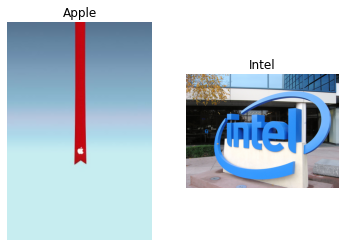

In [37]:
plt.figure()
plt.subplot(1,2,1)
img = plot_random_image("Apple")
plt.subplot(1,2,2)
img2 = plot_random_image("Intel")

#Preprocessing Data Creating Batchs and DataGen

In [29]:
for dirpath, dirnames, filenames in os.walk("train_images"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} in {dirpath}")

There are 27 directories and 0 in train_images
There are 0 directories and 30 in train_images/Ford
There are 0 directories and 30 in train_images/Pepsi
There are 0 directories and 30 in train_images/Texaco
There are 0 directories and 30 in train_images/Vodafone
There are 0 directories and 30 in train_images/Nike
There are 0 directories and 30 in train_images/Mini
There are 0 directories and 30 in train_images/Apple
There are 0 directories and 30 in train_images/Fedex
There are 0 directories and 30 in train_images/DHL
There are 0 directories and 30 in train_images/RedBull
There are 0 directories and 30 in train_images/BMW
There are 0 directories and 30 in train_images/Ferrari
There are 0 directories and 30 in train_images/Citroen
There are 0 directories and 30 in train_images/Porsche
There are 0 directories and 30 in train_images/Yahoo
There are 0 directories and 30 in train_images/Sprite
There are 0 directories and 30 in train_images/Google
There are 0 directories and 30 in train_image

In [30]:
27 * 30

810

In [42]:
train_dir

PosixPath('/content/train_images')

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
val_datagen = ImageDataGenerator(rescale=1/255.)
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")
val_data = val_datagen.flow_from_directory(val_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

Found 810 images belonging to 27 classes.
Found 135 images belonging to 27 classes.


In [32]:
images, labels = train_data[0]
len(images)

32

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

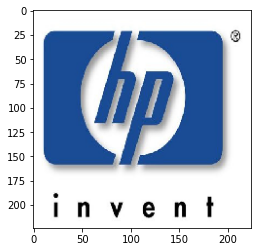

In [34]:
plt.imshow(images[0])
# class_names[labels[0]] 
# class_names
labels[0]